# UNDERSTANDING K-MEANS WITH MALL CUSTOMER SEGMENTATION DATASET

**Problem Statement**

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

You want to understand the customers like who can be easily converge (Target Customers) so that the sense can be given to marketing team and plan the strategy accordingly.

**Data Source** - https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

### READ THE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('7.datasets_Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### DATA INFORMATION

This dataset is composed by the following five features:

CustomerID: Unique ID assigned to the customer

Gender: Gender of the customer

Age: Age of the customer

Annual Income (k$): Annual Income of the customer

Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### DATA CLEANING

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
#rename data's columns
df.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'},inplace=True)

Check for missing values

In [9]:
#count null values
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [10]:
#Create Categorical variables for Gender
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

In [11]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### EDA

In [12]:
#data correlation
df.corr()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
AnnualIncome,0.977548,0.056410,-0.012398,1.000000,0.009903
SpendingScore,0.013835,-0.058109,-0.327227,0.009903,1.000000


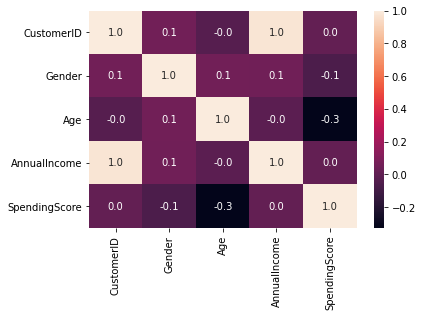

In [13]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

0    112
1     88
Name: Gender, dtype: int64

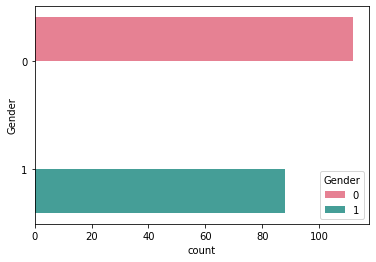

In [14]:
#Count and plot gender
sns.countplot(y = 'Gender', data = df, palette="husl", hue = "Gender")
df["Gender"].value_counts()

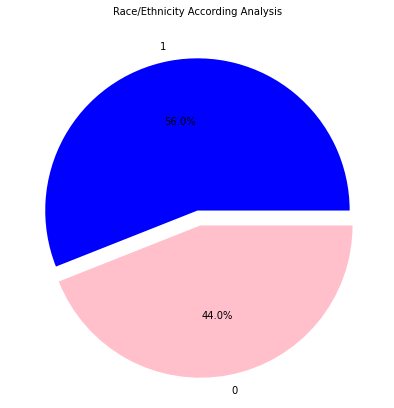

In [15]:
labels=df.Gender.unique()
colors=['blue','pink']
explode=[0,0.1]
values=df.Gender.value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

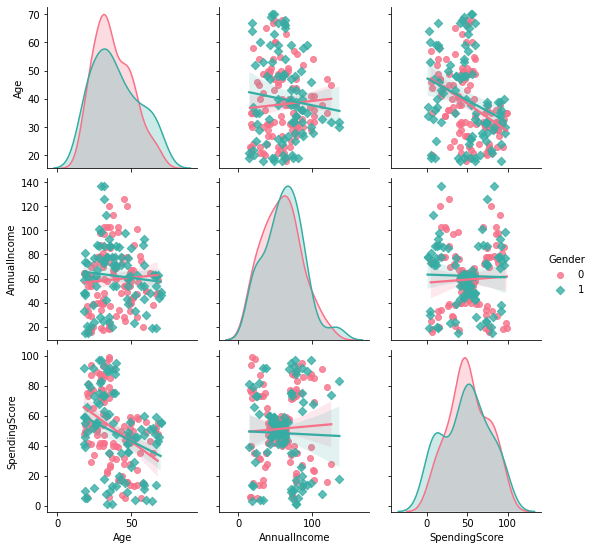

In [16]:
#Pairplot with variables we want to study
sns.pairplot(df, vars=["Age", "AnnualIncome", "SpendingScore"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

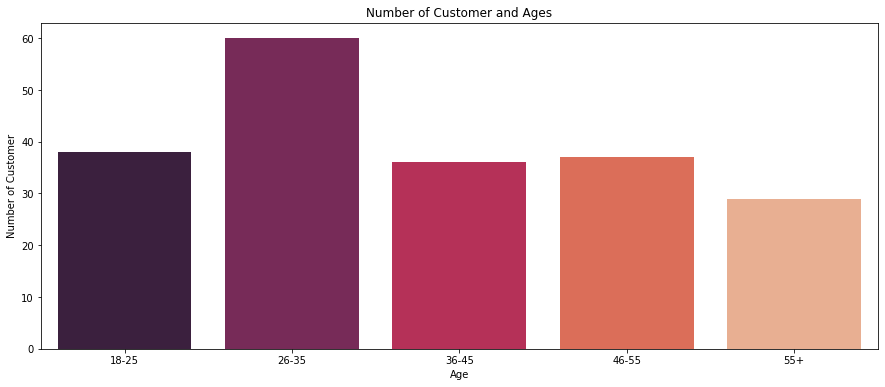

In [17]:
#Age bracket visualization
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Clearly the 26–35 age group outweighs every other age group.

Let's make a bar plot to visualize the number of customers according to their spending scores.

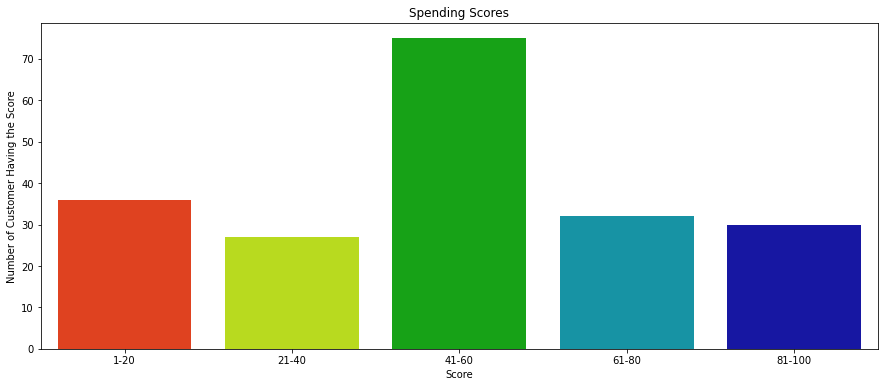

In [18]:
ss1_20 = df["SpendingScore"][(df["SpendingScore"] >= 1) & (df["SpendingScore"] <= 20)]
ss21_40 = df["SpendingScore"][(df["SpendingScore"] >= 21) & (df["SpendingScore"] <= 40)]
ss41_60 = df["SpendingScore"][(df["SpendingScore"] >= 41) & (df["SpendingScore"] <= 60)]
ss61_80 = df["SpendingScore"][(df["SpendingScore"] >= 61) & (df["SpendingScore"] <= 80)]
ss81_100 = df["SpendingScore"][(df["SpendingScore"] >= 81) & (df["SpendingScore"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

The majority of the customers have spending score in the range 41–60.

Let's make a bar plot to visualize the number of customers according to their annual income.

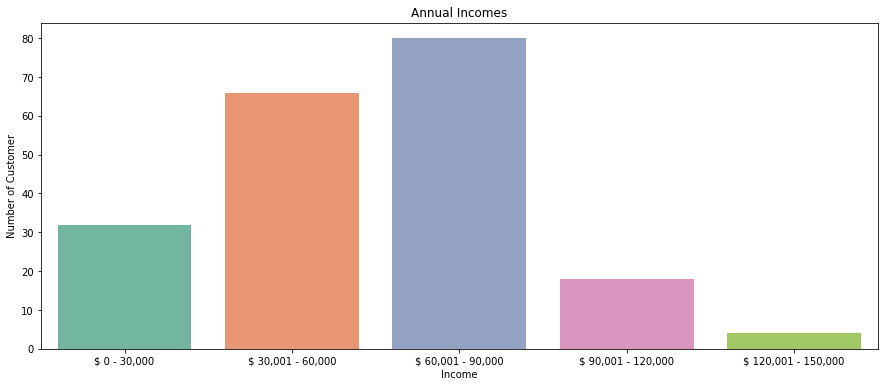

In [19]:
ai0_30 = df["AnnualIncome"][(df["AnnualIncome"] >= 0) & (df["AnnualIncome"] <= 30)]
ai31_60 = df["AnnualIncome"][(df["AnnualIncome"] >= 31) & (df["AnnualIncome"] <= 60)]
ai61_90 = df["AnnualIncome"][(df["AnnualIncome"] >= 61) & (df["AnnualIncome"] <= 90)]
ai91_120 = df["AnnualIncome"][(df["AnnualIncome"] >= 91) & (df["AnnualIncome"] <= 120)]
ai121_150 = df["AnnualIncome"][(df["AnnualIncome"] >= 121) & (df["AnnualIncome"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

The majority of the customers have annual income in the range 60000 and 90000.

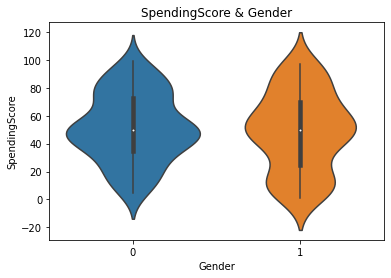

In [20]:
#Spending score vs Gender
sns.violinplot(y=df['SpendingScore'],x=df['Gender'])
plt.title('SpendingScore & Gender')
plt.show()

### ELBOW METHOD

Selecting the number of clusters

In [21]:
#Creating values for the elbow
X = df.loc[:,["Age", "AnnualIncome", "SpendingScore"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

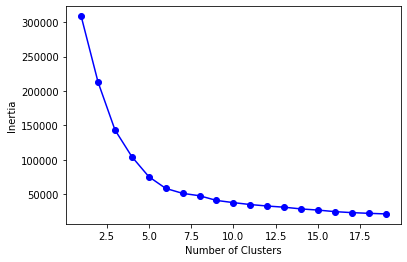

In [22]:
#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### CLUSTERING

In [23]:
#Training kmeans with 5 clusters
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

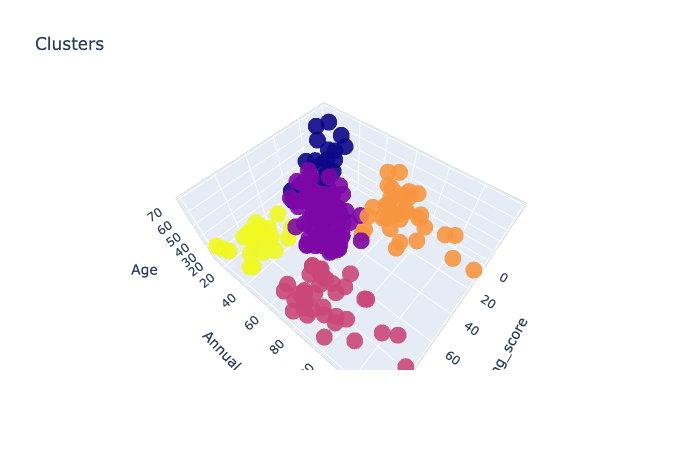

In [24]:
#Create a 3d plot to view the data sepparation made by Kmeans
trace1 = go.Scatter3d(
    x= X['SpendingScore'],
    y= X['AnnualIncome'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)
fig.show("png")

**Yellow Cluster** - The yellow cluster groups young people with moderate to low annual income who actually spend a lot.

**Purple Cluster** - The purple cluster groups reasonably young people with pretty decent salaries who spend a lot.

**Pink Cluster** - The pink cluster basically groups people of all ages whose salary isn't pretty high and their spending score is moderate.

**Orange Cluster** - The orange cluster groups people who actually have pretty good salaries and barely spend money, their age usually lays between thirty and sixty years.

**Blue Cluster** - The blue cluster groups whose salary is pretty low and don't spend much money in stores, they are people of all ages.